## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [380]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [381]:
# Read and view the dataframe
df = pd.read_csv('ab_data.csv')
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


b. Use the below cell to find the number of rows in the dataset.

In [382]:
# View row and column counts
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [383]:
# Find unique values in each variable
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [384]:
# Find proportion of converted users 
(len(df[df['converted'] == 1])) / df.shape[0] 

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [385]:
# Find number of unmatched ones
df.query("group == 'control' & landing_page == 'new_page'").count() + df.query("group == 'treatment' & landing_page == 'old_page'").count()



user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [386]:
# Checking whether there are  any missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [387]:
df.query("group == 'control' & landing_page == 'new_page'").count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [388]:
df.query("group == 'treatment' & landing_page == 'old_page'").count()


user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [389]:
list_1 = []
for i in df.query("group == 'control' & landing_page == 'new_page'").index:
    list_1.append(i)

    


In [390]:
list_2 = []
for i in df.query("group == 'treatment' & landing_page == 'old_page'").index:
    list_2.append(i)


In [391]:
df2 = df.drop(labels = list_1, axis = 0)

In [392]:
df2 = df2.drop(labels = list_2, axis = 0)

In [393]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [394]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [395]:
# Find number of duplicates 
df2.user_id.duplicated().sum()

1

In [396]:
# Find duplicated rows 
duplicated_id = df2[df2.user_id.duplicated()]
print(duplicated_id)


      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [397]:
# Find other tie of the duplicated one
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [398]:
# Drop one of the duplicated rows 
df2 = df2.drop(1899)


In [399]:
# Test after dropping duplicates 
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [400]:
len(df2.query('converted == 1')) / df.shape[0] 

0.11801560727796304

b. Given that an individual was in the `control` group, what is the probability they converted?

In [377]:
len(df2.query("group == 'control' & converted == 1")) / len(df2.query("group == 'control'"))

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [378]:
len(df2.query("group == 'treatment' & converted == 1")) / len(df2.query("group == 'treatment'"))

0.11880806551510564

d. What is the probability that an individual received the new page?

In [401]:
len(df2.query('landing_page == "new_page"')) / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**My answer**

**As seen from the results from a. through d. I observe that probability of converting is higher on the old page (p = 0.1204) rather than the new page (p = 0.1188).**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**My answer**

**Null Hypothese = H0**

**Alternative Hypothese = H1**

**H0: 𝑝𝑜𝑙𝑑 >= 𝑝𝑛𝑒𝑤 or 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 >= 0  - The new page is no better, or even worse, than the old page**

**H1: 𝑝𝑜𝑙𝑑 < 𝑝𝑛𝑒𝑤 or 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 < 0    - The new page is better than the old page**



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [342]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [343]:
p_new = len(df2.query('converted == 1')) / len(df2.query('converted'))
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [402]:
p_old = len(df2.query('converted == 1')) / len(df2.query('converted'))
p_old

0.11959708724499628

c. What is $n_{new}$?

In [403]:
n_new = len(df2.query('landing_page == "new_page"'))
n_new 

145310

d. What is $n_{old}$?

In [404]:
n_old = len(df2.query('landing_page == "old_page"')) 
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [405]:
new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1 - p_new]).mean()
new_page_converted

0.8798293303970821

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [406]:
old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old]).mean()
old_page_converted

0.8791318474055921

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [407]:
obs_diff = new_page_converted - old_page_converted
obs_diff

0.0006974829914899727

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [408]:
p_diffs = []
for _ in range(10000):
    b_sample_new = np.random.choice([0, 1], size = n_new, p = [p_new, 1 - p_new]).mean()
    b_sample_old = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old]).mean()
    p_diffs.append(b_sample_new - b_sample_old)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  10.,   77.,  399., 1272., 2453., 2830., 1914.,  823.,  195.,
          27.]),
 array([-0.0046437 , -0.00376546, -0.00288723, -0.00200899, -0.00113076,
        -0.00025252,  0.00062571,  0.00150395,  0.00238219,  0.00326042,
         0.00413866]),
 <BarContainer object of 10 artists>)

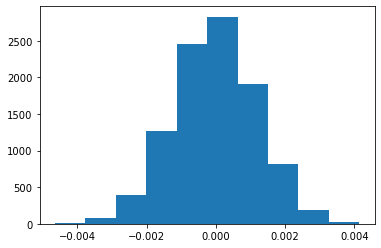

In [409]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

# Plot sampling distribution
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

(array([2.000e+00, 6.700e+01, 4.350e+02, 1.512e+03, 2.738e+03, 2.886e+03,
        1.702e+03, 5.310e+02, 1.160e+02, 1.100e+01]),
 array([-4.79980148e-03, -3.85316645e-03, -2.90653142e-03, -1.95989639e-03,
        -1.01326135e-03, -6.66263221e-05,  8.80008709e-04,  1.82664374e-03,
         2.77327877e-03,  3.71991380e-03,  4.66654884e-03]),
 <BarContainer object of 10 artists>)

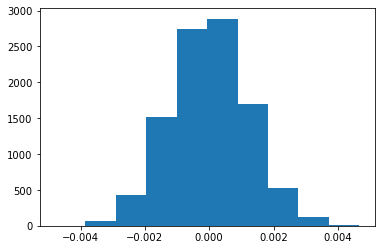

In [352]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

# Plot the null distribution
plt.hist(null_vals)

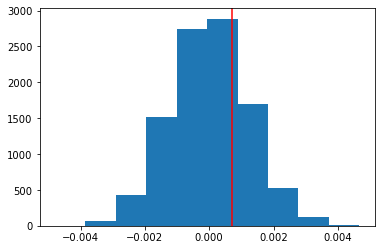

In [410]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(x = obs_diff, color = 'red');

In [411]:
# Compute p-value
# Actual observed differences in conversion, infered from ab_data.csv
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
print(act_diff)
p_diffs = np.array(p_diffs)
(act_diff < p_diffs).mean()

-0.0015782389853555567


0.9048

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**My answer.**

**After calculating the p-value we can state that I fail to reject null hypothesis (H0). As p-value (0.9048) is greater than alpha (0.05). It means that old page is better than new page in converting.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [412]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
convert_old

17489

In [413]:
convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]
convert_new

17264

In [414]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

In [415]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [416]:
p_value, z_score = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
(p_value, z_score)

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [417]:
# Critical value of 95% confidence
from scipy.stats import norm

norm.ppf(1-(0.05))

1.6448536269514722

In [418]:
# Significance of the z-score

norm.cdf(z_score)

0.8172827523025925

**My answer.**

**It seems from the result that, findings in j and k parts are valid. Now we again fail to reject the null hypothesis (H0). Because z_score (1.31) is less than critical value of 95% confidence (1.65).**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**My answer.**

**Logistic regression. Because it has one of two possible outcomes, converted (1), not converted (0).**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [419]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [420]:
# Add intercept 
df2['intercept'] = 1

In [421]:
# Create dummy variables 
df2[['treatment', 'control']] = pd.get_dummies(df2['group'])


In [422]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [423]:
# Rename the control variable as ab_page
df2.rename(columns = {'control': 'ab_page'}, inplace = True)


In [424]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [425]:
# Drop the treatment columns, which is not needed anymore
df2.drop('treatment', axis = 1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [426]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [370]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-07-20 00:18 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**My answer.**

P-value associated with the ab_page is 0.1899. As seen it is different from the p-value I found in the j and k sections. Because:

The null and alternative hypotheses in the Part II:

**H0: 𝑝𝑜𝑙𝑑 >= 𝑝𝑛𝑒𝑤 or 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 >= 0**

**H1: 𝑝𝑜𝑙𝑑 < 𝑝𝑛𝑒𝑤 or 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 < 0**

The null and alternative hypotheses associated with regression model:

**H0: 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 = 0**

**H1: 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 != 0**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**My answer.**
There can be other factors that influence the conversion/no conversion decision, such as economic status/employment status, age, education, social status etc. It is crucial to consider other variables while analyzing the results, because they can have a strong impact on it. However, there can be disadvantages, such as:
- multiple variables can destroy the results;
- other variables can be correlated with one another, rather than the response model;
- make the explanation of the relationship more burdensome. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [427]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,treatment,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [428]:
# Find number of unique countries
df_new.country.nunique()

3

In [373]:
df_new

,country,timestamp,group,landing_page,converted,intercept,treatment,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1
...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,1,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,1,0


In [429]:
### Create the necessary dummy variables
df_new['intercept'] = 1

# Create dummy variables 
df_new[['UK', 'US', 'CA' ]] = pd.get_dummies(df_new['country'])

In [375]:
# Drop country variable 
df_new.drop('country', axis = 1)

,timestamp,group,landing_page,converted,intercept,treatment,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
653118,2017-01-09 03:12:31.034796,control,old_page,0,1,1,0,0,0,1
878226,2017-01-05 15:02:50.334962,control,old_page,0,1,1,0,0,1,0
799368,2017-01-09 18:07:34.253935,control,old_page,0,1,1,0,0,1,0


In [430]:
# Keep UK as a baseline 
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'CA']])
results = logit_mod.fit()
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-07-20 11:27 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
CA             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

**My answer.**

**As seen from the p-values (0.0745, 0.1295), I can state that I have failed to reject the null hypothesis again. The result shows that location does not affect the conversion. It is recommendable to keep the old page and not invest to design new page.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [431]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_US'] = df_new['ab_page'] * df_new['US']
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']

In [433]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_US', 'ab_CA', 'US', 'CA']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.3422
Date:               2021-07-20 11:39 BIC:              212835.2404
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           4                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.22052    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
ab_US          0.0108    0.0228    0.4749  0.6349  -0.0339   0.0555
ab_CA         -0.0206    0.0137   -1.5052  0.1323  -0.0473   0.0062
US             0.0453    0.0306    1.4806  0.1387  -0.0147   0.1053
CA             0.0511    0.0277    1.8414  0.0656  -0.0033   0.1054
==================================================================

"""

**Final Summary**

**I had null and alternative hypothesis regarding the adopting the new page or keeping the old page of the website.**

**H0: 𝑝𝑜𝑙𝑑 >= 𝑝𝑛𝑒𝑤 or 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 >= 0 - The new page is no better, or even worse, than the old page**

**H1: 𝑝𝑜𝑙𝑑 < 𝑝𝑛𝑒𝑤 or 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 < 0 - The new page is better than the old page**

**As the result of the AB test, the p-value suggest that I fail to reject the null hypothesis. It means that it is recommendable to go with the old page, as the new page does not convert more in comparison with old page. It is not reasonable to invest on this new page. 
Additionally, I intended to see whethere there can we other factor can influence on the result. For that reason, I added location/state variable to the analysis and saw that it does not make any sense. 
However, it is recommendable to check the results by adding social and economic status in further investigation. Because if we talk about the conversion as paying to get something, it depends on the economic capability of the people.** 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.